# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 11.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
$$
    Q(w) = \dfrac{1}{\ell} \left( y^T - w^T X^T \right) \left( y - Xw \right) = \dfrac{1}{\ell} \left( y^T y - y^T X w - w^T X^T y + w^T X^T X w \right) 
$$
$$
 \nabla_{w} Q(w) = \dfrac{1}{\ell} \left( -2 X^T y + 2 X^T X w \right) = \dfrac{2}{\ell} X^T \left( X w - y \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [304]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [305]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [306]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [307]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [308]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

ник ankatevs

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124192290/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124197860/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124198548/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124792019/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124336480/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [309]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [310]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [311]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

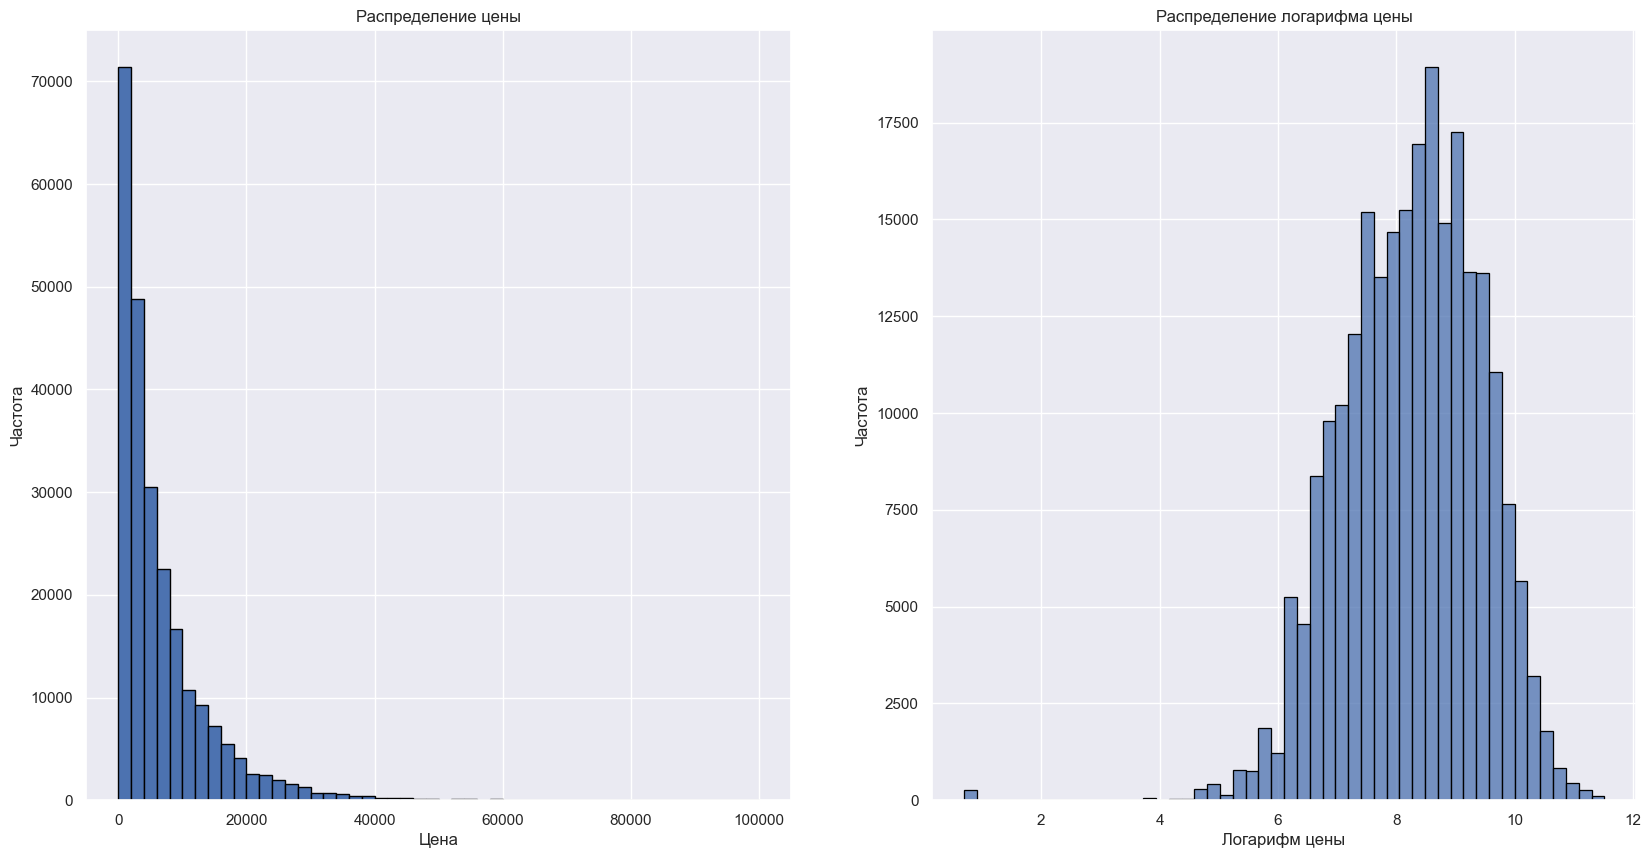

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

In [312]:
categorical = ["notRepairedDamage", "fuelType", "gearbox", "vehicleType", "model", "brand"]
numeric = ["log_autoAgeMonths", "log_kilometer", "powerPS"]
other = []

# YOUR CODE (EDA):

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.hist(data["price"], bins=50, edgecolor='black')
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)


data['log_price'] = np.log1p(data['price'])  # добавим столбец логарифма цены
plt.subplot(1, 2, 2)
sns.histplot(data['log_price'], bins=50, edgecolor='black')
plt.title('Распределение логарифма цены')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Удалим выбросы, оставив данные до 99-го процентиля
lower_limit = data["log_price"].quantile(0.01)
data = data[(data["log_price"] >= lower_limit)]

# проанализируем типы столбцов 
data.dtypes

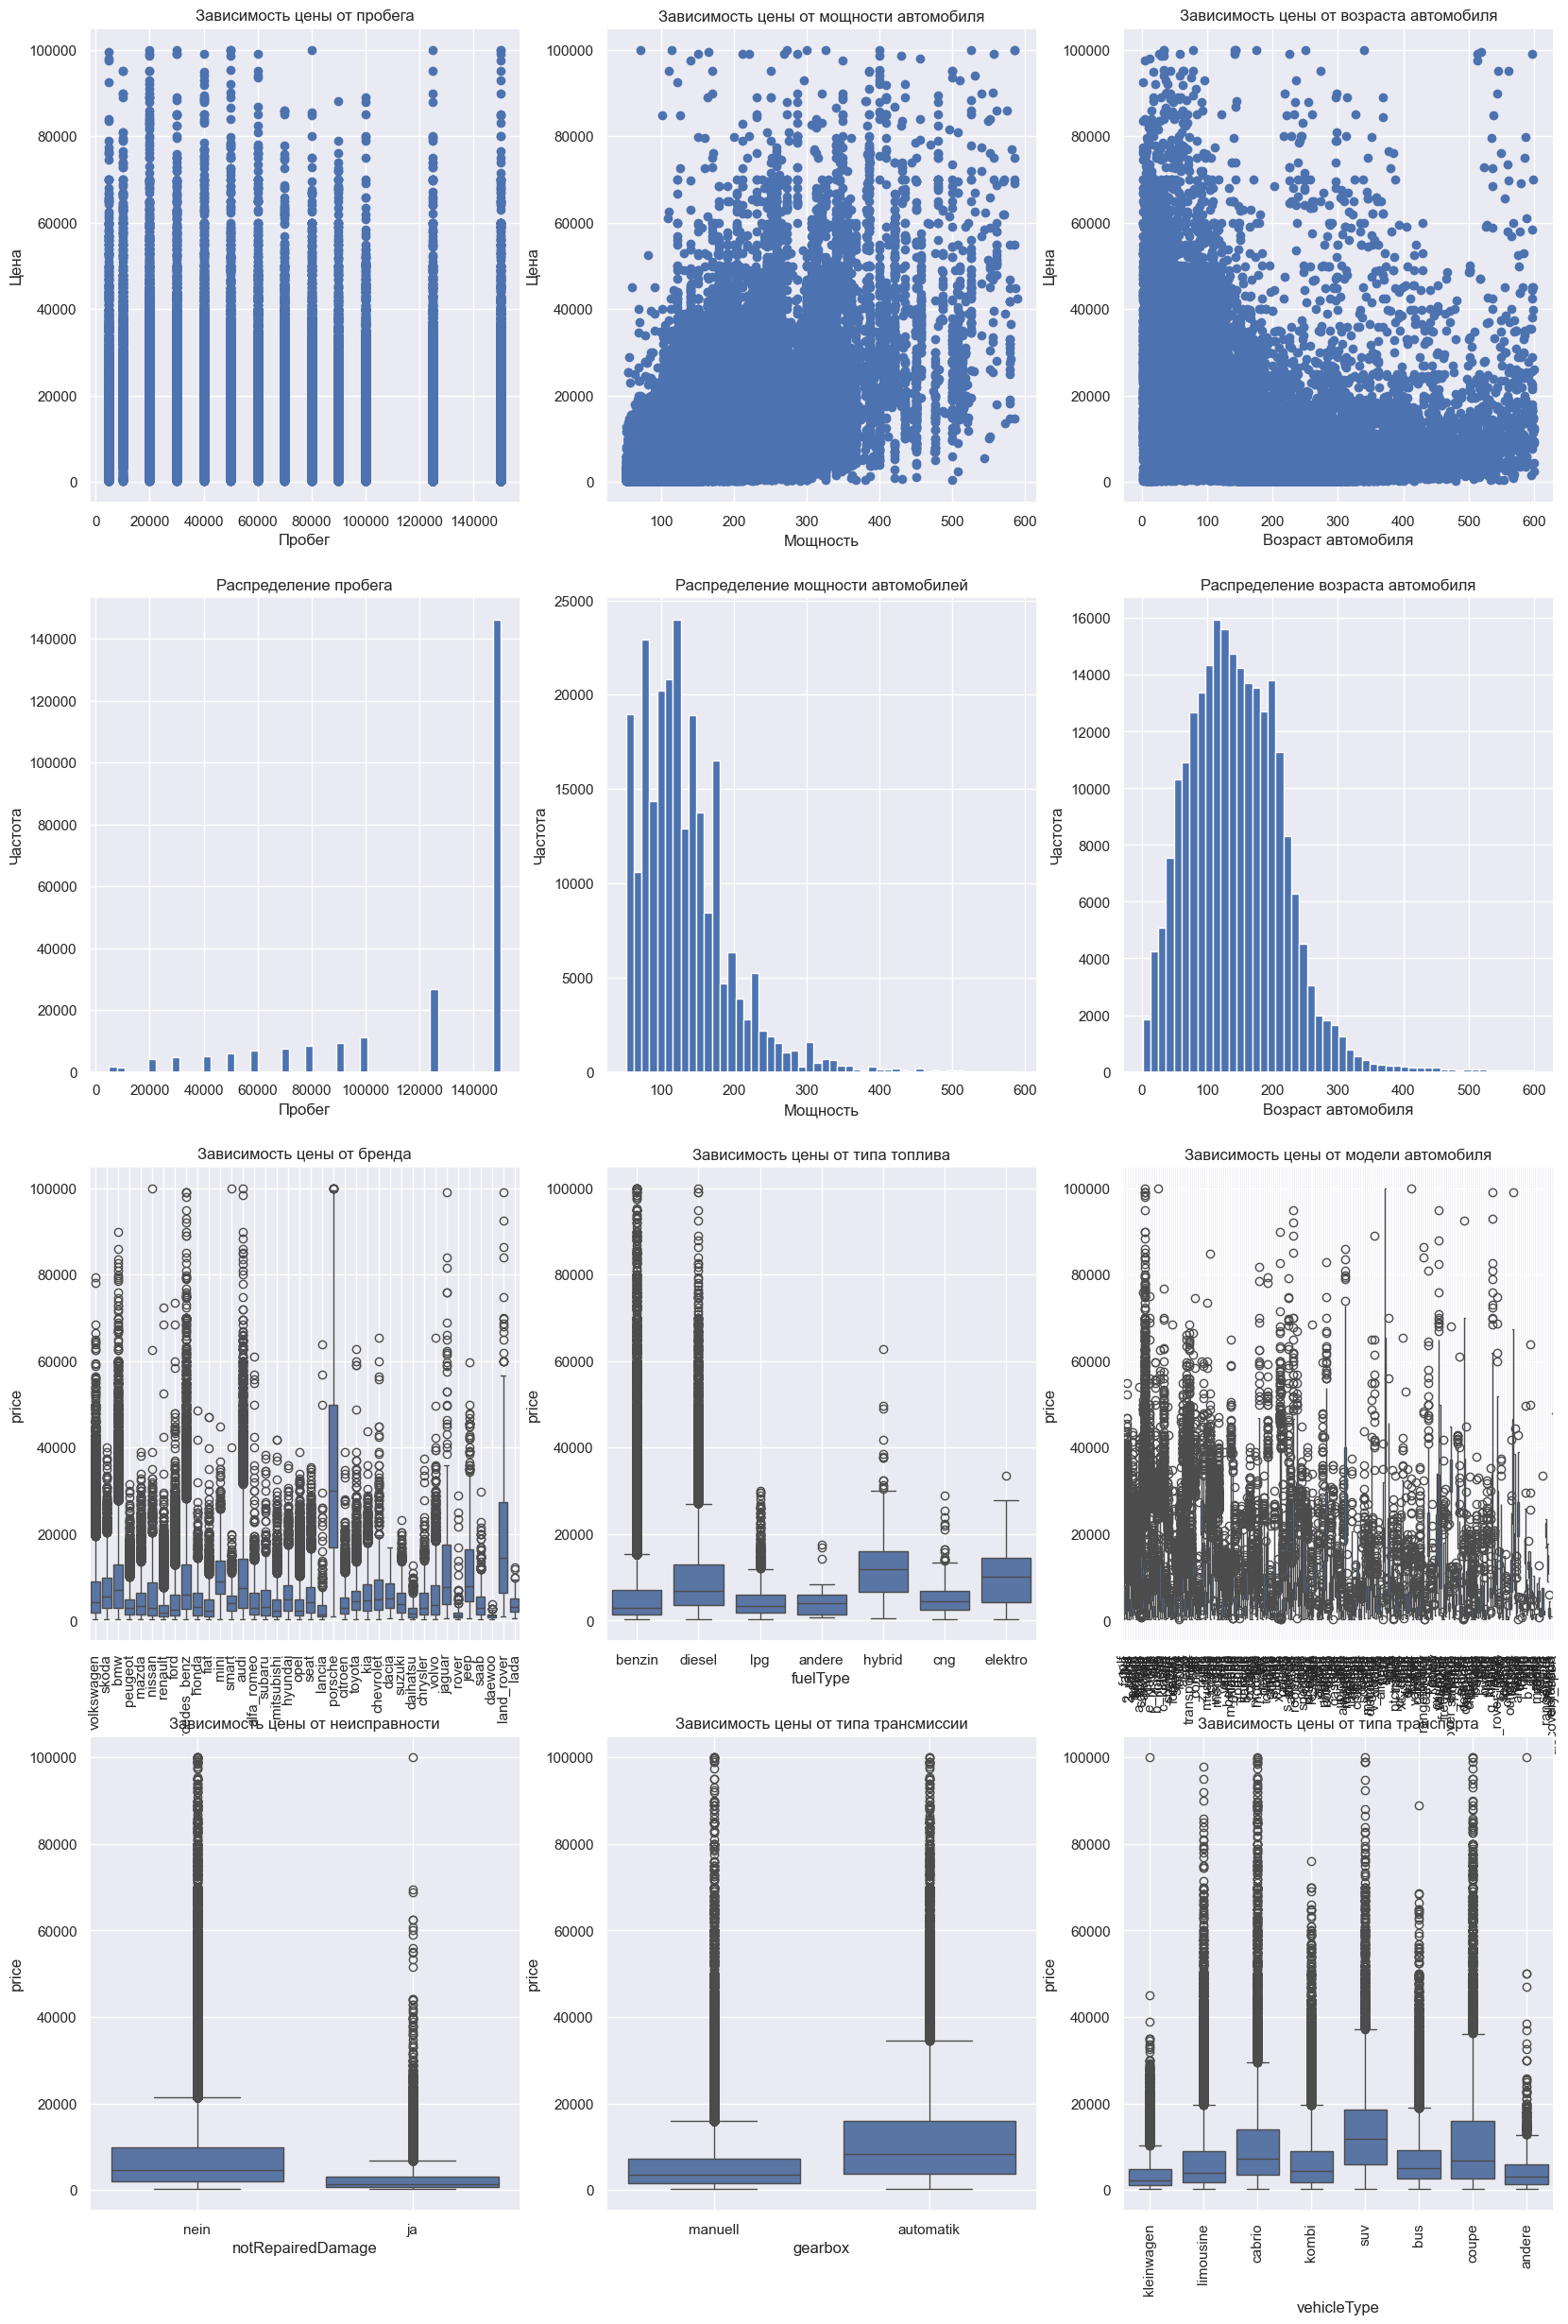

In [313]:

plt.figure(figsize=(20, 30))
# Зависимость цены от пробега
plt.subplot(4, 3, 1)
plt.scatter(data['kilometer'], data['price'])
plt.title('Зависимость цены от пробега')
plt.xlabel('Пробег')
plt.ylabel('Цена')
plt.grid(True)

# Зависимость цены от мощности автомобиля
plt.subplot(4, 3, 2)
plt.scatter(data['powerPS'], data['price'])
plt.title('Зависимость цены от мощности автомобиля')
plt.xlabel('Мощность')
plt.ylabel('Цена')
plt.grid(True)

# Зависимость цены от возраста автомобиля
plt.subplot(4, 3, 3)
plt.scatter(data["autoAgeMonths"], data['price'])
plt.title('Зависимость цены от возраста автомобиля')
plt.xlabel('Bозраст автомобиля')
plt.ylabel('Цена')
plt.grid(True)

# Распределение пробега
plt.subplot(4, 3, 4)
plt.hist(data['kilometer'], bins=50)
plt.title('Распределение пробега')
plt.xlabel('Пробег')
plt.ylabel('Частота')
plt.grid(True)

# Распределение мощности
plt.subplot(4, 3, 5)
plt.hist(data['powerPS'], bins=50)
plt.title('Распределение мощности автомобилей')
plt.xlabel('Мощность')
plt.ylabel('Частота')
plt.grid(True)

# Распределение возраста автомобиля
plt.subplot(4, 3, 6)
plt.hist(data["autoAgeMonths"], bins=50)
plt.title('Распределение возраста автомобиля')
plt.xlabel('Возраст автомобиля')
plt.ylabel('Частота')
plt.grid(True)

# Boxplot для зависимости цены от бренда
plt.subplot(4, 3, 7)
sns.boxplot(x='brand', y='price', data=data)
plt.title('Зависимость цены от бренда')
plt.xticks(rotation=90)
plt.grid(True)

# Boxplot для зависимости цены от типа топлива
plt.subplot(4, 3, 8)
sns.boxplot(x='fuelType', y='price', data=data)
plt.title('Зависимость цены от типа топлива')
plt.grid(True)

# Boxplot для зависимости цены от модели
plt.subplot(4, 3, 9)
sns.boxplot(x='model', y='price', data=data)
plt.title('Зависимость цены от модели автомобиля')
plt.xticks(rotation=90)
plt.grid(True)

# Boxplot для зависимости цены от неисправности
plt.subplot(4, 3, 10)
sns.boxplot(x="notRepairedDamage", y='price', data=data)
plt.title('Зависимость цены от неисправности')
plt.grid(True)

# Boxplot для зависимости цены от типа трансмиссии
plt.subplot(4, 3, 11)
sns.boxplot(x="gearbox", y='price', data=data)
plt.title('Зависимость цены от типа трансмиссии')
plt.grid(True)

# Boxplot для зависимости цены от типа транспорта
plt.subplot(4, 3, 12)
sns.boxplot(x="vehicleType", y='price', data=data)
plt.title('Зависимость цены от типа транспорта')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

Полезные признаки: пробег, мощность, но нужно обработать выбросы, возраст автомобиля так же будет полезен, но будет полезно логарифмировать, тк большой разброс, тип топлива, тип трансмиссии и тип автомобиля тоже полезные.

In [314]:
# Удалим выбросы в столбце мощности
upper_limit = data["powerPS"].quantile(0.99)
data = data[data["powerPS"] <= upper_limit]

# добавим столбцы логарифма пробега и возраста автомобиля
data['log_kilometer'] = np.log1p(data['kilometer'])
data['log_autoAgeMonths'] = np.log1p(data['autoAgeMonths'])

In [315]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price'].to_numpy()

In [316]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [317]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_help, Y_train, Y_help = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_help, Y_help, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [318]:
# YOUR CODE:
import descents
from sklearn.metrics import r2_score

lambdas = np.logspace(-5, -0.5, num=20)
result = dict()

for method in ["full", "stochastic", "momentum", "adam"]:

    best_lambda = None
    best_r2 = -np.inf
    best_mse = np.inf
    best_train_mse = np.inf
    best_val_mse = np.inf
    best_iterations = 0
    train_errors = []
    descent_config = {
        'descent_name' : method,
        'kwargs' : {
            'dimension' : np.shape(X_val)[1]
        } 
    }
    print("Метод:", method)

    for lambda_ in lambdas:        
        model = LinearRegression(descent_config)
        descent_config['kwargs']['lambda_'] = lambda_
        model.fit(X_train, Y_train) # обучаем 
        
        # оцениваем на валидационной выборке
        Y_val_pred = model.predict(X_val)
        val_r2 = r2_score(Y_val, Y_val_pred)
        val_mse = model.calc_loss(X_val, Y_val)
        
        # оцениваем на обучающей выборке
        Y_train_pred = model.predict(X_train)
        train_mse = model.calc_loss(X_train, Y_train)
        
        # сохраняем параметры для лучшей лямбды
        if val_r2 > best_r2:
            best_val_mse = val_mse
            best_train_mse = train_mse
            best_r2 = val_r2
            best_lambda = lambda_
            best_iterations = len(model.loss_history)
            train_errors = model.loss_history

    result[method] = train_errors
    # выводим результат
    print(f"Лучшее lambda для {method}: {best_lambda}")
    print(f"Количество итераций до сходимости: {best_iterations}")
    print(f"R^2 на валидационной выборке: {best_r2}")
    print(f"Ошибка на валидационной выборке: {best_val_mse}")
    print(f"Ошибка на обучающей выборке: {best_train_mse} \n")

Метод: full
Лучшее lambda для full: 0.31622776601683794
Количество итераций до сходимости: 31
R^2 на валидационной выборке: 0.547199387991493
Ошибка на валидационной выборке: 0.5286149361664575
Ошибка на обучающей выборке: 0.5343038502078998 

Метод: stochastic
Лучшее lambda для stochastic: 0.18329807108324336
Количество итераций до сходимости: 43
R^2 на валидационной выборке: 0.5555640377208155
Ошибка на валидационной выборке: 0.5188497577072078
Ошибка на обучающей выборке: 0.5214191899083813 

Метод: momentum
Лучшее lambda для momentum: 0.31622776601683794
Количество итераций до сходимости: 84
R^2 на валидационной выборке: 0.717067273632745
Ошибка на валидационной выборке: 0.33030535101224284
Ошибка на обучающей выборке: 0.33679697099270195 

Метод: adam
Лучшее lambda для adam: 0.31622776601683794
Количество итераций до сходимости: 192
R^2 на валидационной выборке: 0.7750048633133318
Ошибка на валидационной выборке: 0.2626670253156636
Ошибка на обучающей выборке: 0.2648263940800939 


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

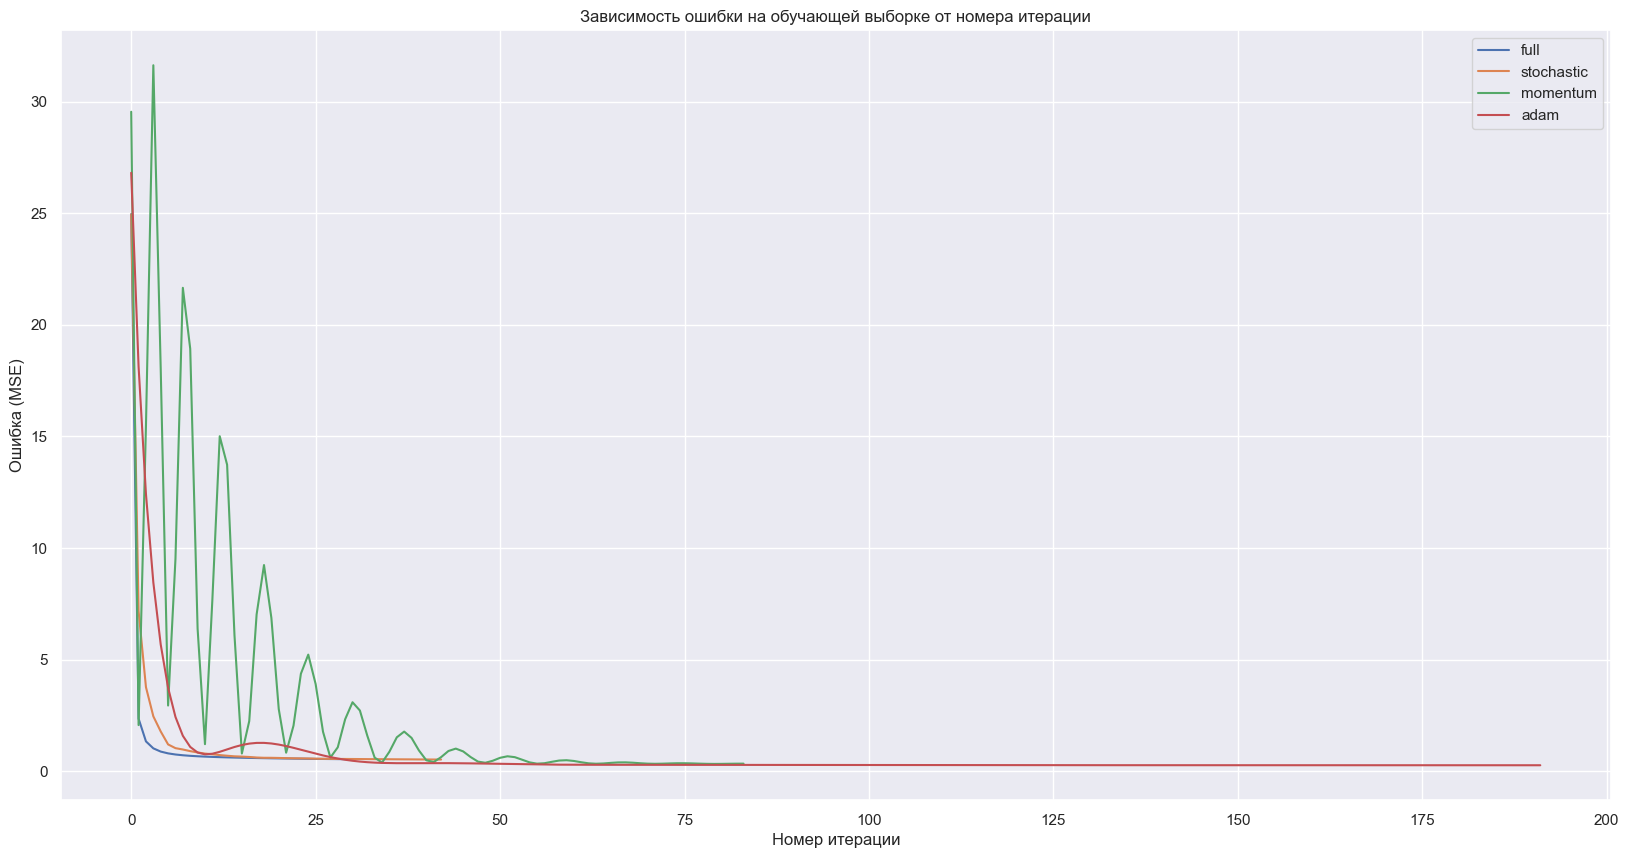

In [319]:
# YOUR CODE:
plt.figure(figsize=(20, 10))

for method in ["full", "stochastic", "momentum", "adam"]:
    plt.plot(range(len(result[method])), result[method], label=method)

plt.title('Зависимость ошибки на обучающей выборке от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка (MSE)')
plt.legend()
plt.grid(True)
plt.show()

`### ваше решение тут ###`

Adam показал наилучшие результаты среди методов: самая низкая ошибка и высокий R².

MomentumDescent также достиг хорошего качества, но потребовал меньше итераций по сравнению с Adam.

StochasticDescent также можно рассматривать как приемлемый метод, поскольку он быстрее сходится, хотя качество хуже, чем у Adam и Momentum.

VanillaGradientDescent оказался неэффективным и не смог обучиться должным образом.

Таким образом, лучше импользовать Adam, если важна наибольшая точность, или MomentumDescent для более быстрого решения.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

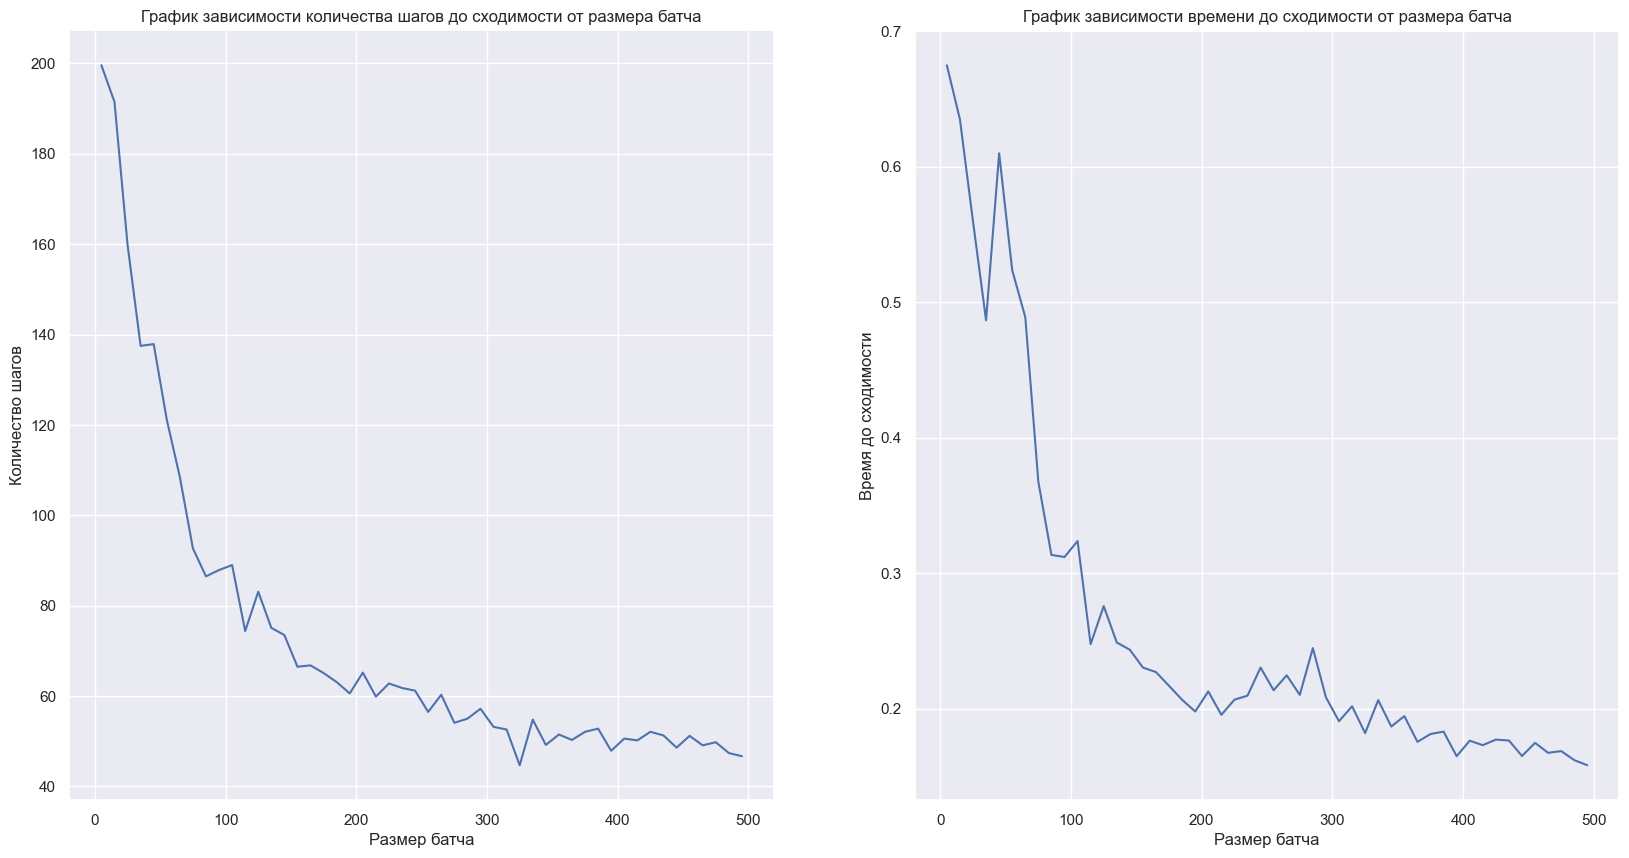

In [320]:
import time
batch_sizes = np.arange(5, 500, 10)
k = 10
mean_time = []
mean_iterations = []
iterations = []
time_m = []

for i in batch_sizes:
    descent_config = {
        'descent_name' : 'stochastic',
        'kwargs' : {
            'dimension' : np.shape(X_val)[1], 
            'batch_size' : i, 
            'lambda_' : 0.31622776601683794
        } 
    }

    time_m.clear()
    iterations.clear()
    for j in range(k):
        model = LinearRegression(descent_config)
        start = time.time()
        model.fit(X_train, Y_train) 
        finish = time.time()
        iterations.append(len(model.loss_history))
        time_m.append(finish - start)
    mean_time.append(np.mean(time_m)) 
    mean_iterations.append(np.mean(iterations))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, mean_iterations)
plt.title('График зависимости количества шагов до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Количество шагов')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, mean_time)
plt.title('График зависимости времени до сходимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Время до сходимости')
plt.grid(True)
plt.show()

`### ваше решение тут ###`

C увеличением размера батча количество шагов и время до сходимости уменьшается, но этот эффект становится менее заметным на больших значениях. Значит нужно искать оптимальный размер батча, тк слишком большие батчи могут снижать эффективность из-за дополнительных вычислительных затрат, несмотря на снижение количества шагов и времени до сходимости.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124532758/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Метод: full
Лучшее lambda для full: 0.31622776601683794
Лучшее mu для full: 10.0
Количество итераций до сходимости: 180
R^2 на валидационной выборке: 0.6812218763558291
Ошибка на валидационной выборке: 0.3721524949667264
Ошибка на обучающей выборке: 0.374358946073151 

Метод: stochastic
Лучшее lambda для stochastic: 0.31622776601683794
Лучшее mu для stochastic: 10.0
Количество итераций до сходимости: 218
R^2 на валидационной выборке: 0.6987391042512872
Ошибка на валидационной выборке: 0.35170228341622406
Ошибка на обучающей выборке: 0.3548199818648187 

Метод: momentum
Лучшее lambda для momentum: 0.31622776601683794
Лучшее mu для momentum: 0.3981071705534969
Количество итераций до сходимости: 221
R^2 на валидационной выборке: 0.7600979792533056
Ошибка на валидационной выборке: 0.2800698321071074
Ошибка на обучающей выборке: 0.2839239298048535 

Метод: adam
Лучшее lambda для adam: 0.31622776601683794
Лучшее mu для adam: 0.000630957344480193
Количество итераций до сходимости: 186
R^2 на 

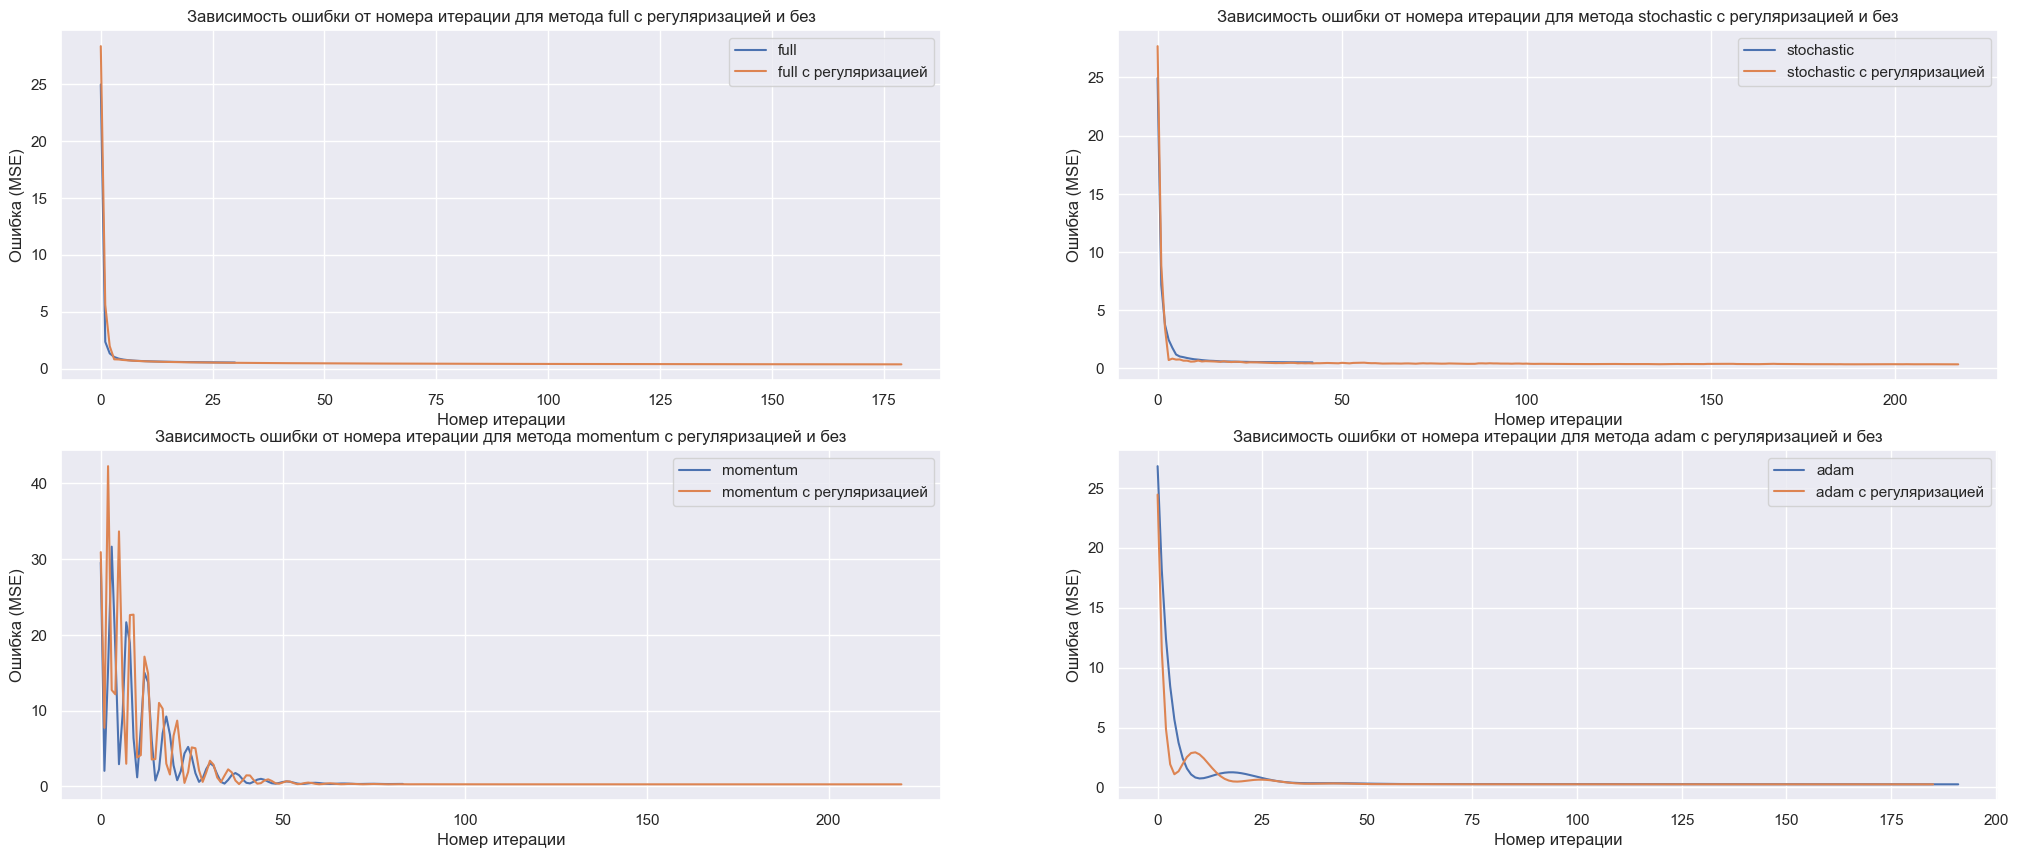

In [321]:
# YOUR CODE:
import descents

lambdas = np.logspace(-5, -0.5, 6) 
mu = np.logspace(-6, 1, 6)
result2 = {}
methods = ["full", "stochastic", "momentum", "adam"]
for method in methods:
    best_mu = None
    best_lambda = None
    best_r2 = -np.inf
    best_mse = np.inf
    best_train_mse = np.inf
    best_val_mse = np.inf
    best_iterations = 0
    train_errors = []

    descent_config = {
        'descent_name' : method,
        'regularized' : True, 
        'kwargs' : {
            'dimension' : np.shape(X_val)[1]
        } 
    }
    print("Метод:", method)

    for lambda_ in lambdas:      
        for mu_ in mu:  
            model = LinearRegression(descent_config)
            descent_config['kwargs']['lambda_'] = lambda_
            descent_config['kwargs']['mu'] = mu_

            model.fit(X_train, Y_train) # обучаем 
            
            # оцениваем на валидационной выборке
            Y_val_pred = model.predict(X_val)
            val_r2 = r2_score(Y_val, Y_val_pred)
            val_mse = model.calc_loss(X_val, Y_val)
            
            # оцениваем на обучающей выборке
            Y_train_pred = model.predict(X_train)
            train_mse = model.calc_loss(X_train, Y_train)
            
            # сохраняем параметры для лучшей лямбды
            if val_r2 > best_r2:
                best_mu = mu_
                best_val_mse = val_mse
                best_train_mse = train_mse
                best_r2 = val_r2
                best_lambda = lambda_
                best_iterations = len(model.loss_history)
                train_errors = model.loss_history

    result2[method] = train_errors
    # выводим результат
    print(f"Лучшее lambda для {method}: {best_lambda}")
    print(f"Лучшее mu для {method}: {best_mu}")
    print(f"Количество итераций до сходимости: {best_iterations}")
    print(f"R^2 на валидационной выборке: {best_r2}")
    print(f"Ошибка на валидационной выборке: {best_val_mse}")
    print(f"Ошибка на обучающей выборке: {best_train_mse} \n")

plt.figure(figsize=(25, 10))
for o in range(4):
    plt.subplot(2, 2, o + 1)
    plt.plot(range(len(result[methods[o]])), result[methods[o]], label=methods[o])
    plt.plot(range(len(result2[methods[o]])), result2[methods[o]], label=f"{methods[o]} с регуляризацией")
    plt.title(f'Зависимость ошибки от номера итерации для метода {methods[o]} с регуляризацией и без')
    plt.xlabel('Номер итерации')
    plt.ylabel('Ошибка (MSE)')
    plt.legend()
    plt.grid(True)
plt.show()

`### ваше решение тут ###`

Регуляризация незначительно увеличивает количество итераций до сходимости для всех методов, но при этом количество итераций для методов `full` и `stochastic` почти не меняется, а для `momentum` и `adam` более заметна. Так же регуляризация улучшает качество модели, особенно заметно для методов `momentum` и `adam`, где `R^2` значительно выше и ошибка на валидации меньше с регуляризацией, чем без неё. Таким образом, регуляризация помогает модели лучше обобщать на новых данных и снижает переобучение.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

$$
    \frac{dL}{da} = \frac{d}{da} \log\left(\cosh(a - y)\right) =  \frac{1}{\cosh(a - y)} \cdot \frac{d}{da} \cosh(a - y) = \frac{\sinh(a - y)}{\cosh(a - y)} = \tanh(a - y)
$$


Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [322]:
# YOUR CODE:
import descents
lambdas = np.logspace(-5, -0.5, num=20)
result3 = {}
methods = ["full", "stochastic", "momentum", "adam"]
for method in methods:

    best_lambda = None
    best_r2 = -np.inf
    best_mse = np.inf
    best_train_mse = np.inf
    best_val_mse = np.inf
    best_iterations = 0
    train_errors = []

    descent_config = {
        'descent_name' : method,
        'loss_function' : descents.LossFunction.LogCosh,
        'kwargs' : {
            'dimension' : np.shape(X_val)[1]
        } 
    }
    print(f"Метод: {method}")

    for lambda_ in lambdas:        
        model = LinearRegression(descent_config)
        descent_config['kwargs']['lambda_'] = lambda_
        model.fit(X_train, Y_train) # обучаем 
        
        # оцениваем на валидационной выборке
        Y_val_pred = model.predict(X_val)
        val_r2 = r2_score(Y_val, Y_val_pred)
        val_mse = model.calc_loss(X_val, Y_val)
        
        # оцениваем на обучающей выборке
        Y_train_pred = model.predict(X_train)
        train_mse = model.calc_loss(X_train, Y_train)
        
        # сохраняем параметры для лучшей лямбды
        if val_r2 > best_r2:
            best_val_mse = val_mse
            best_train_mse = train_mse
            best_r2 = val_r2
            best_lambda = lambda_
            best_iterations = len(model.loss_history)
            train_errors = model.loss_history

    result3[method] = train_errors
    # выводим результат
    print(f"Лучшее lambda для {method}: {best_lambda}")
    print(f"Количество итераций до сходимости: {best_iterations}")
    print(f"R^2 на валидационной выборке: {best_r2}")
    print(f"Ошибка на валидационной выборке: {best_val_mse}")
    print(f"Ошибка на обучающей выборке: {best_train_mse} \n")

Метод: full
Лучшее lambda для full: 0.31622776601683794
Количество итераций до сходимости: 31
R^2 на валидационной выборке: 0.5592011405337146
Ошибка на валидационной выборке: 0.5146036793665818
Ошибка на обучающей выборке: 0.5215979088597383 

Метод: stochastic
Лучшее lambda для stochastic: 0.31622776601683794
Количество итераций до сходимости: 63
R^2 на валидационной выборке: 0.5935621516798324
Ошибка на валидационной выборке: 0.47448945859940944
Ошибка на обучающей выборке: 0.4815897227848011 

Метод: momentum
Лучшее lambda для momentum: 0.31622776601683794
Количество итераций до сходимости: 84
R^2 на валидационной выборке: 0.7322959441233887
Ошибка на валидационной выборке: 0.3125268797252817
Ошибка на обучающей выборке: 0.31728085844248877 

Метод: adam
Лучшее lambda для adam: 0.31622776601683794
Количество итераций до сходимости: 199
R^2 на валидационной выборке: 0.776027718413139
Ошибка на валидационной выборке: 0.26147290925452654
Ошибка на обучающей выборке: 0.264501674147354 

Log-Cosh функция потерь демонстрирует немного лучшее качество на валидационной и обучающей выборках, а также быстрее сходится по сравнению с MSE для большинства методов. Это можно объяснить тем, что Log-Cosh менее чувствительна к выбросам, чем MSE. Таким образом, Log-Cosh может быть предпочтительна для данной задачи, особенно с методами momentum и adam, где она демонстрирует лучшие результаты.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

Увидела в тиктоке, захотела, сделала, вкусно, но лучше есть остывшим

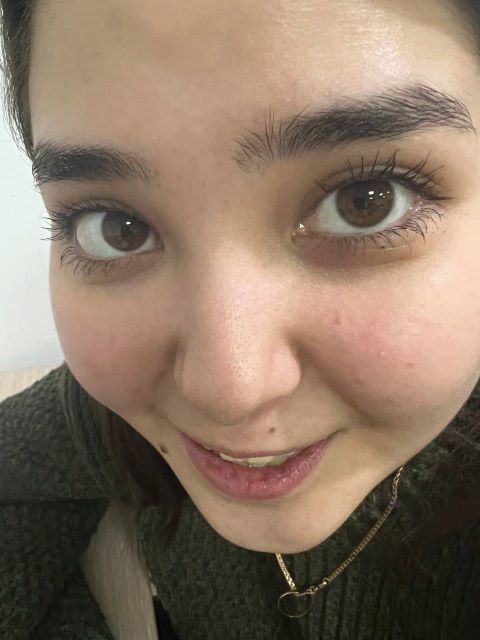 <video controls src="IMG_4652.MP4" title="Title"></video> 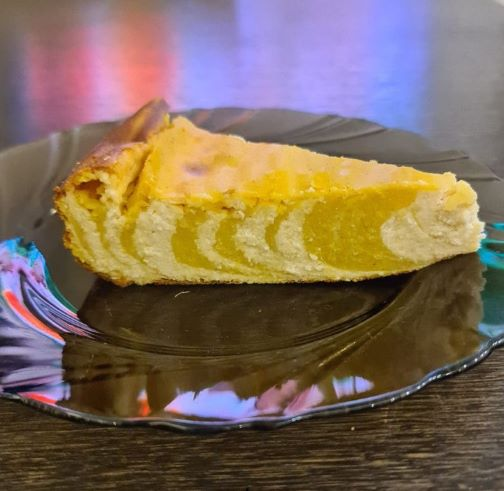



### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [323]:
# YOUR CODE:
import descents
from sklearn.metrics import r2_score

lambdas = np.logspace(-5, -0.5, num=20)

descent_config = {
    'descent_name' : 'adamax',
    'kwargs' : {
        'dimension' : np.shape(X_val)[1]
    }
} 

best_lambda = None
best_r2 = -np.inf
best_mse = np.inf
best_train_mse = np.inf
best_val_mse = np.inf
best_iterations = 0
train_errors = []
print("Метод: AdaMax")

for lambda_ in lambdas:        
    model = LinearRegression(descent_config)
    descent_config['kwargs']['lambda_'] = lambda_
    model.fit(X_train, Y_train) # обучаем 
    
    # оцениваем на валидационной выборке
    Y_val_pred = model.predict(X_val)
    val_r2 = r2_score(Y_val, Y_val_pred)
    val_mse = model.calc_loss(X_val, Y_val)
    
    # оцениваем на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_mse = model.calc_loss(X_train, Y_train)
    
    # сохраняем параметры для лучшей лямбды
    if val_r2 > best_r2:
        best_val_mse = val_mse
        best_train_mse = train_mse
        best_r2 = val_r2
        best_lambda = lambda_
        best_iterations = len(model.loss_history)
        train_errors = model.loss_history

# выводим результат
print(f"Лучшее lambda для AdaMax: {best_lambda}")
print(f"Количество итераций до сходимости: {best_iterations}")
print(f"R^2 на валидационной выборке: {best_r2}")
print(f"Ошибка на валидационной выборке: {best_val_mse}")
print(f"Ошибка на обучающей выборке: {best_train_mse} \n")

Метод: AdaMax
Лучшее lambda для AdaMax: 0.31622776601683794
Количество итераций до сходимости: 208
R^2 на валидационной выборке: 0.7279336596893342
Ошибка на валидационной выборке: 0.3176195599171635
Ошибка на обучающей выборке: 0.3191754138547192 



AdaMax и Adam близки по показателям, но adam показал высокое качество и меньшую ошибку на валидационной и на обучающей выборках и потребовал меньше итераций

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [324]:
# YOUR CODE: